Life cycle of data:
1. Feature Engineering performing:
      Handling missing values (seaborn,matplotlib)(7-8)
      Good at python,numpy,pandas,matplotlib,seaborn.
      refer kaggle kernels
      towards data science(refer techniques)
      Categorical Features(8-9)
      Feature selection
      correlation,pearson,..
      one hot encoding, label encoding
      

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [113]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [115]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

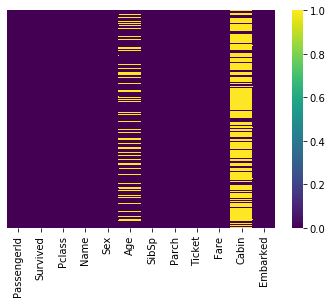

In [116]:
#heatmap to visualize the nan values
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis') #THis yellow color shows that these are the Nan values.

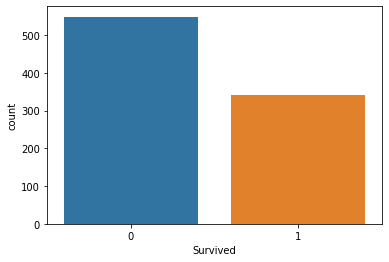

In [117]:
sns.countplot(x='Survived',data=df)

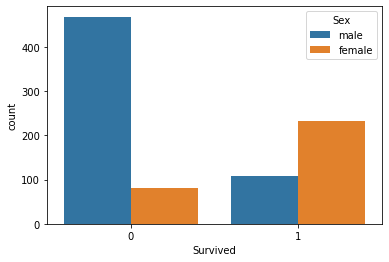

In [118]:
sns.countplot(x='Survived',hue='Sex',data=df,)

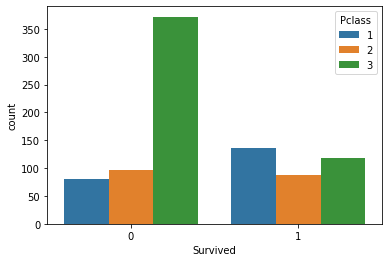

In [119]:
sns.countplot(data=df,hue='Pclass',x='Survived')

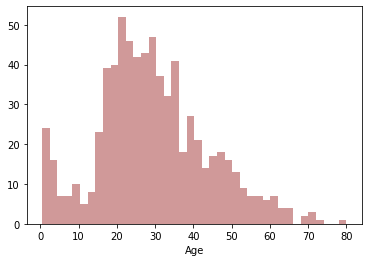

In [120]:
sns.distplot(df['Age'].dropna(),kde=False,bins=40,color='darkred')

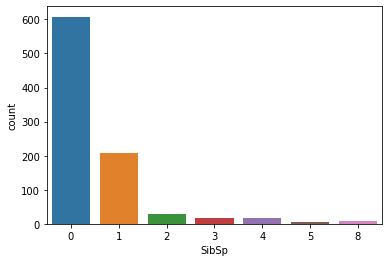

In [121]:
sns.countplot(x='SibSp',data=df)

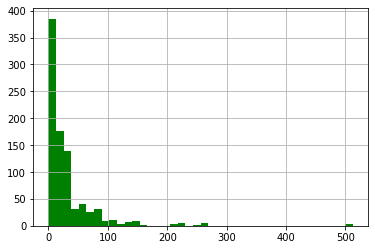

In [122]:
df['Fare'].hist(bins=40,color='green')

# Data Cleaning

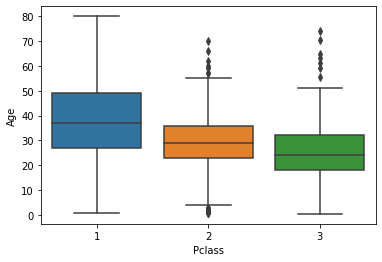

In [123]:
#since age column has missing values.
sns.boxplot(data=df,x='Pclass',y='Age')

In [124]:
def replace(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [125]:
df['Age']=df[['Age','Pclass']].apply(replace,axis=1)

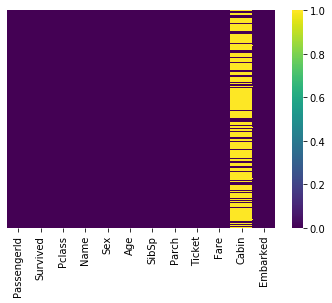

In [126]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis') #here age got replaced by values that we mentioned in function

In [127]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [128]:
df.drop('Cabin',inplace=True,axis=1)

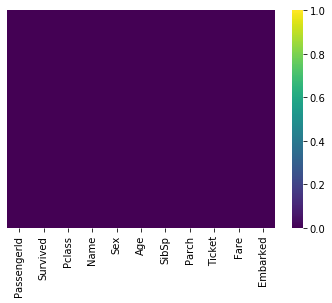

In [129]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis') #removed all nan values. 

In [130]:
#categorical variables handling
 #get dummies-convert columns 3 categories==3 columns
pd.get_dummies(df['Embarked'],drop_first=True).head()#dummy variable trap.Dropped frst col bcoz all are interelaed cols.

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [131]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
sex.head()


,male
0,1
1,0
2,0
3,0
4,1


In [132]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)
embark.head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [133]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [134]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [137]:
pd.concat([df,sex,embark],axis=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [138]:
#logistic regression model
df.drop('Survived',axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,24.0,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [141]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [142]:
from sklearn.model_selection import train_test_split

In [151]:
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.3,random_state=101)

In [152]:
from sklearn.linear_model import LogisticRegression


In [153]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
pred=lg.predict(xtest)
pred

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0])

In [160]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [161]:
accuracy=confusion_matrix(ytest,pred)
accuracy

array([[133,  21],
       [ 60,  54]])

In [163]:
accuracy1=accuracy_score(ytest,pred)
accuracy1

0.6977611940298507